In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [199]:
import numpy as np
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import display

In [3]:
# Input csv of census data

df_census = pd.read_csv("censusData/census_zipcode_level.csv")
df_census.head()

,Zip,State,Population,White,Black,Native,Asian,Islander,Other,Two,...,Families,Married_couple_families,Married_couple_child_under_18,Married_couple_no_child_under_18,Single_parent_families,Single_parent_child_under_18,Single_parent_no_child_under_18,Non_families,Househoulder_living_alone,Householder_living_with_unrelated
0,35004,Alabama,10418,8495,1657,0,198,0,0,42,...,3031,2265,820,1445,766,351,415,1194,1090,104
1,35005,Alabama,7708,4432,3130,2,0,2,0,26,...,2103,1540,530,1010,563,229,334,824,707,117
2,35006,Alabama,3099,2849,205,9,0,0,0,15,...,857,675,261,414,182,73,109,332,314,18
3,35007,Alabama,26630,19673,3210,0,251,10,28,416,...,6680,5457,2533,2924,1223,604,619,2055,1802,253
4,35010,Alabama,20826,12247,7048,93,203,0,0,327,...,5605,3586,1088,2498,2019,1121,898,2302,2112,190


In [6]:
df_census['Zip_Str'] = df_census['Zip'].astype(str)
df_census.head()

,Zip,State,Population,White,Black,Native,Asian,Islander,Other,Two,...,Married_couple_families,Married_couple_child_under_18,Married_couple_no_child_under_18,Single_parent_families,Single_parent_child_under_18,Single_parent_no_child_under_18,Non_families,Househoulder_living_alone,Householder_living_with_unrelated,Zip_Str
0,35004,Alabama,10418,8495,1657,0,198,0,0,42,...,2265,820,1445,766,351,415,1194,1090,104,35004
1,35005,Alabama,7708,4432,3130,2,0,2,0,26,...,1540,530,1010,563,229,334,824,707,117,35005
2,35006,Alabama,3099,2849,205,9,0,0,0,15,...,675,261,414,182,73,109,332,314,18,35006
3,35007,Alabama,26630,19673,3210,0,251,10,28,416,...,5457,2533,2924,1223,604,619,2055,1802,253,35007
4,35010,Alabama,20826,12247,7048,93,203,0,0,327,...,3586,1088,2498,2019,1121,898,2302,2112,190,35010


In [11]:
# Make a column of the three digit zip codes
def make_three_dig_zip(x):
    x = x[:-2]
    
    # Add missing zeros at the start of the zip code if they are present
    if len(x) == 2:
        x = '0' + x
    if len(x) == 1:
        x = '00' + x
    if len(x) == 0:
        x = '000'
    
    return x

df_census['Zip_ThreeDig'] = df_census['Zip_Str'].apply(make_three_dig_zip)
df_census.head()

,Zip,State,Population,White,Black,Native,Asian,Islander,Other,Two,...,Married_couple_child_under_18,Married_couple_no_child_under_18,Single_parent_families,Single_parent_child_under_18,Single_parent_no_child_under_18,Non_families,Househoulder_living_alone,Householder_living_with_unrelated,Zip_Str,Zip_ThreeDig
0,35004,Alabama,10418,8495,1657,0,198,0,0,42,...,820,1445,766,351,415,1194,1090,104,35004,350
1,35005,Alabama,7708,4432,3130,2,0,2,0,26,...,530,1010,563,229,334,824,707,117,35005,350
2,35006,Alabama,3099,2849,205,9,0,0,0,15,...,261,414,182,73,109,332,314,18,35006,350
3,35007,Alabama,26630,19673,3210,0,251,10,28,416,...,2533,2924,1223,604,619,2055,1802,253,35007,350
4,35010,Alabama,20826,12247,7048,93,203,0,0,327,...,1088,2498,2019,1121,898,2302,2112,190,35010,350


In [44]:
# Calculate the total number of males and females
df_census['female_allAges'] = df_census['Female_0to9_Years'] + df_census['Female_10to19_Years'] + df_census['Female_20to29_Years'] + df_census['Female_30to39_Years'] + df_census['Female_40to49_Years'] + df_census['Female_50to59_Years'] + df_census['Female_60to69_Years'] + df_census['Female_70p_Years']
df_census['male_allAges'] = df_census['Male_0to9_Years'] + df_census['Male_10to19_Years'] + df_census['Male_20to29_Years'] + df_census['Male_30to39_Years'] + df_census['Male_40to49_Years'] + df_census['Male_50to59_Years'] + df_census['Male_60to69_Years'] + df_census['Male_70p_Years']

# Calculate the total number of older adults (>60)
df_census['OlderPop'] = df_census['Female_60to69_Years'] + df_census['Female_70p_Years'] + df_census['Male_60to69_Years'] + df_census['Male_70p_Years']

In [47]:
df_threeDigZipDemography = pd.DataFrame(columns=['Zip','WhitePct','BlackPct','NativePct','AsianPct','IslanderPct','HispanicPct',
                                                'MalePct','FemalePct','OlderPct'])

zip_list = df_census['Zip_ThreeDig'].unique()

# Calculate the percent of race,gender,and age variables for each three digit zip code
for cZip in zip_list:
    df_temp = df_census[df_census['Zip_ThreeDig']==cZip]
    total_population = df_temp['Population'].sum()

    total_white = df_temp['White'].sum()
    white_pct = total_white / total_population

    total_black = df_temp['Black'].sum()
    black_pct = total_black / total_population

    total_native = df_temp['Native'].sum()
    native_pct = total_native / total_population

    total_asian = df_temp['Asian'].sum()
    asian_pct = total_asian / total_population

    total_islander = df_temp['Islander'].sum()
    islander_pct = total_islander / total_population

    total_Hispanic = df_temp['Hispanic'].sum()
    hispanic_pct = total_Hispanic / total_population

    total_male = df_temp['male_allAges'].sum()
    male_pct = total_male / total_population

    total_female = df_temp['female_allAges'].sum()
    female_pct = total_female / total_population

    total_older = df_temp['OlderPop'].sum()
    older_pct = total_older / total_population

    df_threeDigZipDemography = df_threeDigZipDemography.append({'Zip':cZip, 'WhitePct':white_pct, 'BlackPct':black_pct,
                                                               'NativePct':native_pct, 'AsianPct':asian_pct, 'IslanderPct':islander_pct,
                                                                'HispanicPct':hispanic_pct, 'MalePct':male_pct, 'FemalePct':female_pct,
                                                                'OlderPct':older_pct}, ignore_index=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWa

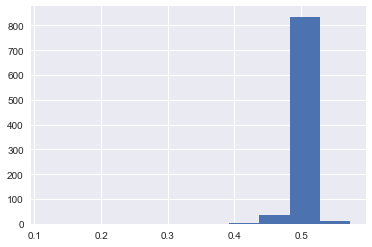

In [167]:
df_threeDigZipDemography['FemalePct'].hist()

In [115]:
# Get zip codes of all accepted applications

years = ['2007_2011','2012_2013','2014','2015','2016Q1','2016Q2','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4',
        '2018Q1','2018Q2','2018Q3']

zipListAccepted = []

for year in years:
    fileName = "RawDataV2/Accepted/LoanStats_" + year + ".csv"
    df_temp = pd.read_csv(fileName)
    zips_temp = df_temp['zip_code']
    cleanedzips_temp = [x for x in zips_temp if str(x) != 'nan']
    zipListAccepted = zipListAccepted + cleanedzips_temp
    

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,6,8,9,10,11,12,14,15,16,17,19,20,21,22,23,26,33,35,45,48,52,122,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import 

In [92]:
# Get zip codes of all rejected applications

years = ['2007_2012','2013_2014','2015','2016Q1','2016Q2','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4',
        '2018Q1','2018Q2','2018Q3']

zipListRejected = []

for year in years:
    fileName = "RawDataV2/Rejected/RejectStats_" + year + ".csv"
    df_temp = pd.read_csv(fileName)
    zips_temp = df_temp['Zip Code']
    cleanedzips_temp = [x for x in zips_temp if str(x) != 'nan']
    zipListRejected = zipListRejected + cleanedzips_temp

In [100]:
for i, cZip in enumerate(zipListRejected):
    zipListRejected[i] = cZip[:-2]

In [117]:
for i, cZip in enumerate(zipListAccepted):
    zipListAccepted[i] = cZip[:-2]

In [163]:
print('There are',df_threeDigZipDemography.shape[0],'zip codes in the census data')
print('There are',len(set(zipListAccepted))-1,'zip codes in the accepted loan data')
print('There are',len(set(zipListRejected))-1,'zip codes in the rejected loan data')


There are 891 zip codes in the census data
There are 953 zip codes in the accepted loan data
There are 1000 zip codes in the rejected loan data


In [139]:
# The list of accepted zip codes in the loan data includes zip codes that are not in use (https://en.wikipedia.org/wiki/List_of_ZIP_code_prefixes)
print('987' in zipListAccepted)

print('987' in df_threeDigZipDemography['Zip'])

True
False


In [173]:
# zipListAcceptedCleaned = [x for x in zipListAccepted if x in zip_list]
df_zipListAccepted = pd.DataFrame({'ZipCode': zipListAccepted})
df_zipListRejected = pd.DataFrame({'ZipCode': zipListRejected})


,ZipCode
0,481
1,010
2,212
3,017
4,209


In [180]:
df_threeDigZipDemography['ZipCode'] = df_threeDigZipDemography['Zip']

In [210]:
df_AcceptedDemography = pd.merge(df_zipListAccepted, df_threeDigZipDemography, how = 'left',on='ZipCode')
df_AcceptedDemography = df_AcceptedDemography[df_AcceptedDemography.WhitePct.notna()]

In [213]:
df_RejectedDemography = pd.merge(df_zipListRejected, df_threeDigZipDemography, how='left', on='ZipCode')
df_RejectedDemography = df_RejectedDemography[df_RejectedDemography.WhitePct.notna()]

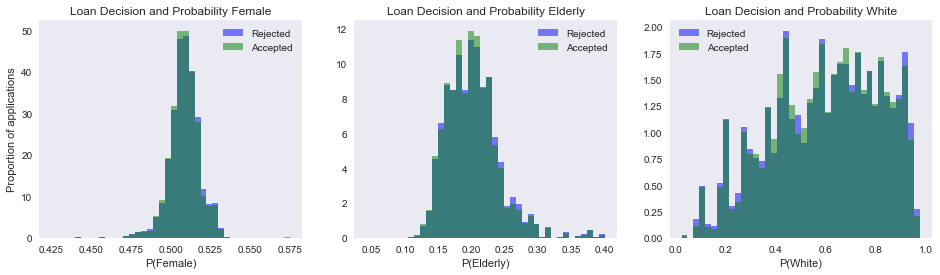

In [248]:
# Make histogram plots of accepted vs rejected by protected class
fig, axs = plt.subplots(1, 3,figsize=(16,4))
fig.subplots_adjust(wspace=0.2)

axs[0].hist(df_RejectedDemography['FemalePct'],range=[0.425, 0.575],alpha=0.5,density=True,color='blue',bins=40,label='Rejected')
axs[0].hist(df_AcceptedDemography['FemalePct'],range=[0.425, 0.575],alpha=0.5,density=True,color='green',bins=40,label='Accepted')
axs[0].set_title('Loan Decision and Probability Female')
axs[0].set_xlabel('P(Female)')
axs[0].set_ylabel('Proportion of applications')
axs[0].legend()
axs[0].grid(False)

axs[1].hist(df_RejectedDemography['OlderPct'],alpha=0.5,density=True,color='blue',bins=40,label='Rejected')
axs[1].hist(df_AcceptedDemography['OlderPct'],alpha=0.5,density=True,color='green',bins=40,label='Accepted')
axs[1].set_title('Loan Decision and Probability Elderly')
axs[1].set_xlabel('P(Elderly)')
# axs[1].set_ylabel('Proportion of applications')
axs[1].legend()
axs[1].grid(False)

axs[2].hist(df_RejectedDemography['WhitePct'],alpha=0.5,density=True,color='blue',bins=40,label='Rejected')
axs[2].hist(df_AcceptedDemography['WhitePct'],alpha=0.5,density=True,color='green',bins=40,label='Accepted')
axs[2].set_title('Loan Decision and Probability White')
axs[2].set_xlabel('P(White)')
# axs[2].set_ylabel('Proportion of applications')
axs[2].legend()
axs[2].grid(False)

plt.show()